In [ ]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [ ]:
path = '/content/drive/MyDrive/DL and NLP/DL/corpus.txt'
corpus=open(path).read()

In [ ]:
corpus

'Next Word Prediction is also called Language Modeling. It is the task of predicting what word comes next. It is one of the fundamental tasks of NLP and has many applications. You might be using it daily when you write texts or emails without realizing it.'

In [ ]:
import re
corpus=corpus.lower()
clean_corpus=re.sub('[^a-z0-9]+',' ', corpus)

In [ ]:
clean_corpus

'next word prediction is also called language modeling it is the task of predicting what word comes next it is one of the fundamental tasks of nlp and has many applications you might be using it daily when you write texts or emails without realizing it '

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokens = word_tokenize(clean_corpus)
tokens

['next',
 'word',
 'prediction',
 'is',
 'also',
 'called',
 'language',
 'modeling',
 'it',
 'is',
 'the',
 'task',
 'of',
 'predicting',
 'what',
 'word',
 'comes',
 'next',
 'it',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'tasks',
 'of',
 'nlp',
 'and',
 'has',
 'many',
 'applications',
 'you',
 'might',
 'be',
 'using',
 'it',
 'daily',
 'when',
 'you',
 'write',
 'texts',
 'or',
 'emails',
 'without',
 'realizing',
 'it']

In [ ]:
train_len = 3

In [ ]:
text_sequences = []
for i in range(train_len,len(tokens)+1):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [ ]:
text_sequences

[['next', 'word', 'prediction'],
 ['word', 'prediction', 'is'],
 ['prediction', 'is', 'also'],
 ['is', 'also', 'called'],
 ['also', 'called', 'language'],
 ['called', 'language', 'modeling'],
 ['language', 'modeling', 'it'],
 ['modeling', 'it', 'is'],
 ['it', 'is', 'the'],
 ['is', 'the', 'task'],
 ['the', 'task', 'of'],
 ['task', 'of', 'predicting'],
 ['of', 'predicting', 'what'],
 ['predicting', 'what', 'word'],
 ['what', 'word', 'comes'],
 ['word', 'comes', 'next'],
 ['comes', 'next', 'it'],
 ['next', 'it', 'is'],
 ['it', 'is', 'one'],
 ['is', 'one', 'of'],
 ['one', 'of', 'the'],
 ['of', 'the', 'fundamental'],
 ['the', 'fundamental', 'tasks'],
 ['fundamental', 'tasks', 'of'],
 ['tasks', 'of', 'nlp'],
 ['of', 'nlp', 'and'],
 ['nlp', 'and', 'has'],
 ['and', 'has', 'many'],
 ['has', 'many', 'applications'],
 ['many', 'applications', 'you'],
 ['applications', 'you', 'might'],
 ['you', 'might', 'be'],
 ['might', 'be', 'using'],
 ['be', 'using', 'it'],
 ['using', 'it', 'daily'],
 ['it', 'd

In [ ]:
#converting the texts into integer sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)
sequences

[[7, 6, 8],
 [6, 8, 2],
 [8, 2, 9],
 [2, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 1],
 [12, 1, 2],
 [1, 2, 4],
 [2, 4, 13],
 [4, 13, 3],
 [13, 3, 14],
 [3, 14, 15],
 [14, 15, 6],
 [15, 6, 16],
 [6, 16, 7],
 [16, 7, 1],
 [7, 1, 2],
 [1, 2, 17],
 [2, 17, 3],
 [17, 3, 4],
 [3, 4, 18],
 [4, 18, 19],
 [18, 19, 3],
 [19, 3, 20],
 [3, 20, 21],
 [20, 21, 22],
 [21, 22, 23],
 [22, 23, 24],
 [23, 24, 5],
 [24, 5, 25],
 [5, 25, 26],
 [25, 26, 27],
 [26, 27, 1],
 [27, 1, 28],
 [1, 28, 29],
 [28, 29, 5],
 [29, 5, 30],
 [5, 30, 31],
 [30, 31, 32],
 [31, 32, 33],
 [32, 33, 34],
 [33, 34, 35],
 [34, 35, 1]]

In [ ]:
sequences=np.asarray(sequences)

In [ ]:
#vocabulary size
vocabulary_size = len(tokenizer.word_counts)+1
vocabulary_size

36

In [ ]:
#trainX
train_inputs=sequences[:,:-1]

In [ ]:
train_inputs

array([[ 7,  6],
       [ 6,  8],
       [ 8,  2],
       [ 2,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12,  1],
       [ 1,  2],
       [ 2,  4],
       [ 4, 13],
       [13,  3],
       [ 3, 14],
       [14, 15],
       [15,  6],
       [ 6, 16],
       [16,  7],
       [ 7,  1],
       [ 1,  2],
       [ 2, 17],
       [17,  3],
       [ 3,  4],
       [ 4, 18],
       [18, 19],
       [19,  3],
       [ 3, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24,  5],
       [ 5, 25],
       [25, 26],
       [26, 27],
       [27,  1],
       [ 1, 28],
       [28, 29],
       [29,  5],
       [ 5, 30],
       [30, 31],
       [31, 32],
       [32, 33],
       [33, 34],
       [34, 35]])

In [ ]:
seq_length=train_inputs.shape[1]
seq_length

2

In [ ]:
#trainY
train_targets=sequences[:,-1]

In [ ]:
train_targets

array([ 8,  2,  9, 10, 11, 12,  1,  2,  4, 13,  3, 14, 15,  6, 16,  7,  1,
        2, 17,  3,  4, 18, 19,  3, 20, 21, 22, 23, 24,  5, 25, 26, 27,  1,
       28, 29,  5, 30, 31, 32, 33, 34, 35,  1])

In [ ]:
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)

In [ ]:
#required libraries
import torch
from torch.optim import Adam
import torch.nn as nn

In [ ]:
#lstm model
class lstm(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        #simple lookup table that stores embeddings of a fixed dictionary and size.
        self.embed = nn.Embedding(vocab_size, embed_size)
        
        #lstm 
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=2, bidirectional=False)
        
        #fully connected layer
        self.linear = nn.Linear(hidden_size*seq_length,vocab_size)
    
    def forward(self, input_word):
        #input sequence to embeddings
        embedded = self.embed(input_word)
        
        #passing the embedding to lstm model
        output, hidden = self.lstm(embedded)
        
        #reshaping
        output=output.view(output.size(0), -1)
        
        #fully connected layer
        output = self.linear(output)
        return output,hidden

In [ ]:
model=lstm(vocab_size=vocabulary_size,embed_size=128, hidden_size=256)

In [ ]:
model

lstm(
  (embed): Embedding(36, 128)
  (lstm): LSTM(128, 256, num_layers=2)
  (linear): Linear(in_features=512, out_features=36, bias=True)
)

In [ ]:
#Adam optimizer
optimizer= Adam(model.parameters(), lr=0.07)

#loss
criterion = nn.BCEWithLogitsLoss()

In [ ]:
#training the model
def train(epoch):
    #set the model to train
    model.train()
    tr_loss=0    
    
    #clearing the Gradients 
    optimizer.zero_grad()
    
    #predict the output
    y_pred, (state_h, state_c) = model(torch.from_numpy(train_inputs))
    
    #compute the loss
    loss=criterion(y_pred,torch.from_numpy(train_targets))
    losses.append(loss)
    
    #backpropagate
    loss.backward()

    #update the parameters
    optimizer.step()
    tr_loss = loss.item()

    print("Epoch : ",epoch,"loss : ",loss)

In [ ]:
#number of epoch
no_epoch=50
losses=[]
for epoch in range(1,no_epoch+1):
    train(epoch)

Epoch :  1 loss :  tensor(0.0873, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  2 loss :  tensor(0.0727, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  3 loss :  tensor(0.0602, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  4 loss :  tensor(0.0481, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  5 loss :  tensor(0.0401, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  6 loss :  tensor(0.0315, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  7 loss :  tensor(0.0252, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  8 loss :  tensor(0.0192, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  9 loss :  tensor(0.0151, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  10 loss :  tensor(0.0120, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  11 loss :  tensor(0.0098, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  12 loss :  tensor(0.0079, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
E

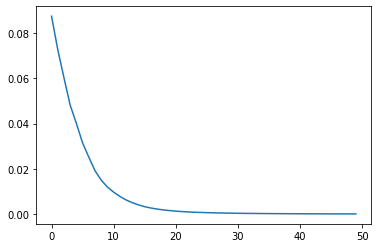

In [ ]:
#plotting the loss, loss is decreasing for each epoch
import matplotlib.pyplot as plt
plt.plot(losses, label='Training loss')
plt.show()

In [ ]:
def predict_next_word(text):
    #set the model to evaluation
    model.eval()

    #preprocess
    text = text.lower().strip()
    
    #converting the text to word tokens
    input_tokens = word_tokenize(text)
    
    #converting the tokens to integer sequence
    sequences = tokenizer.texts_to_sequences([input_tokens])
    
    #converting to array
    sequences=np.asarray(sequences)
    with torch.no_grad():
        #converting to tensor
        sequences=torch.from_numpy(sequences)
        #predicting the output
        predict,(hidden,cell)=model(sequences)
    
    #applying the softmax layer
    softmax = torch.exp(predict)
    prob = list(softmax.numpy())
    
    #index of the predict word
    predictions = np.argmax(prob)

    #converting the sequence back to word
    next_word=tokenizer.sequences_to_texts([[predictions]])
    return next_word

In [ ]:
input_text="next word"
print("Possible next word will be:")
predict_next_word(input_text)

Possible next word will be:


['prediction']

In [ ]:
input_text="Language Modeling"
print("Possible next word will be:")
predict_next_word(input_text)

Possible next word will be:


['and']